In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt', names=['x', 'y'])
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
X = np.array(data.x)
y = np.array(data.y)

In [4]:
# # Khởi tạo data

# X = np.random.rand(1000, 1)
# noise = np.random.rand(1000, 1)

# # y = a * x + b
# # với a = 20
# #     b = 20

# y = 20 * X + 20 + noise

In [5]:
# Loss Function
# Đặt w1 = a; w0 = b
# Ta cần tìm w1 và w0 sao cho chênh lệch giữa y-dự-đoán (y_pred) và y-thực-tế (y) là nhỏ nhất
# Chênh lệch trên toàn bộ dữ liệu tính bằng tổng chênh lệch từng điểm
# J càng nhỏ thì càng gần các điểm dữ liệu
# Nếu J = 0 thì sẽ đi qua tất các điểm dữ liệu

def loss(w1, w0):
    N = X.shape[0]
    y_pred = X*w1 + w0
    J = (1/2) * (1/N) * sum((y_pred - y)**2)
    return J

# Do đó bài toán tìm đường gần với các điểm dữ liệu trở thành tìm w1, w0 sao cho J nhỏ nhất

In [6]:
# Để tìm min(J(w1, w0)) ta cần một thuật toán, đó là Gradient Descent
# Bước 1: khởi tạo ngẫu nhiên w1, w0
# Bước 2: tính đạo hàm của từng biến w1, w2
#         sau đó gán w1 = learning_rate * đạo hàm w1
#                    w0 = learning_rate * đạo hàm w0
#
# Lặp lại bước 2 cho tới khi J đủ nhỏ
#
# Việc quan trọng nhất là tính đạo hàm của loss function theo từng biến w1, w0
#                                                                    d_w1, d_w0
#
# iteration là số lần lặp lại Gradient Descent
# learning_rate là 1 hằng số dương, là tỉ lệ w1; w0 thay đổi sau mỗi lần tính
# nếu tỉ lệ này quá cao sẽ có thể dẫn tới J không bao giờ hội tụ được, có thể vượt quá điểm hội tụ do bước nhảy quá lớn
#                   nhỏ sẽ dẫn tới quá trình hội tụ diễn ra lâu (mất thời gian khi train)
#
#
# 

# Gradient Descent
def grad(w0, w1, learning_rate):
    d_w1 = sum(X*(w0 + w1*X - y)) 
    d_w0 = sum(w0 + w1*X - y)
    w1 -= d_w1*learning_rate
    w0 -= d_w0*learning_rate
    return w1, w0

ites = 10000
learning_rate = 0.0001
w1 = np.random.rand()
w0 = np.random.rand()
for i in range(ites):
    w1, w0 = grad(w0, w1, learning_rate)

In [7]:
print(f'w1 = {float(w1)}\nw0 = {float(w0)}')

w1 = 1.1930336325735547
w0 = -3.895780762684331


In [8]:
print(f'J = {loss(float(w1), float(w0))}')

J = 4.47697137597518


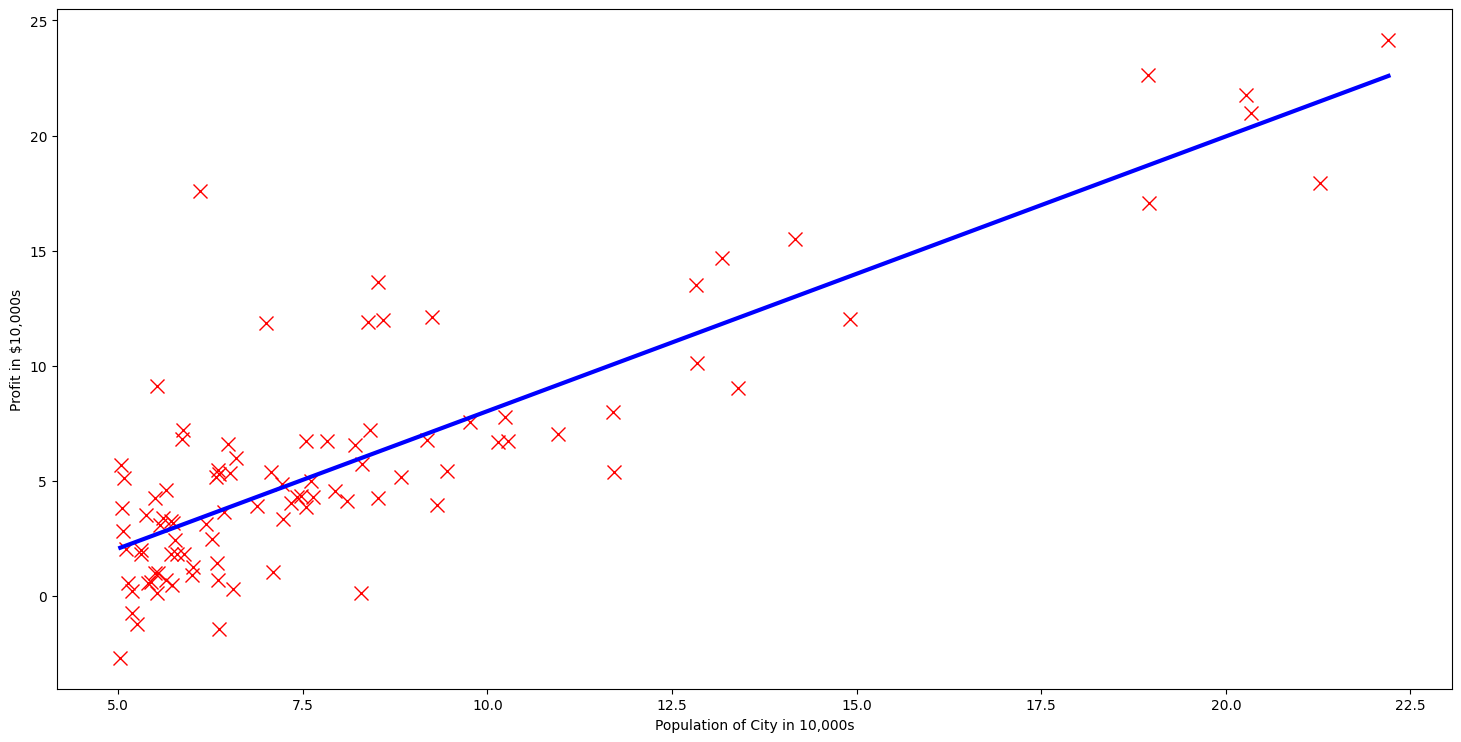

In [9]:
plt.figure(figsize=(18, 9), dpi=100)
plt.plot(X, y, 'rx', markersize=10)
x0 = np.linspace(min(X), max(X), 2, endpoint=True)
y0 = w0 + w1*x0
plt.plot(x0, y0, 'b', linewidth = 3)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [10]:
# Dự đoán tiền lãi với population sizes là 35,000 và 70,000
print(f'Với population sizes = 35,000; tiền lãi = {w0 + w1 * 35000}')

# Dự đoán tiền lãi với population sizes là 70,000
print(f'Với population sizes = 70,000; tiền lãi = {w0 + w1 * 70000}')

Với population sizes = 35,000; tiền lãi = 41752.281359311724
Với population sizes = 70,000; tiền lãi = 83508.45849938614


<hr>

In [11]:
# Ta sẽ kiểm tra lại bằng Linear Regression trong thư viện scikit-learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

LinearRegression()

In [12]:
print(f'w1 = {model.coef_}\nw0 = {model.intercept_}')
print(f'J = {loss(model.coef_, model.intercept_)}')

w1 = [1.19303364]
w0 = -3.895780878311852
J = 4.476971375975177


In [13]:
# Dự đoán y, khi biết x = 0.6 bằng Linear Regression sklearn

pred = model.predict(np.array(35000).reshape(1, -1))
print(f'Với population sizes = 35,000; tiền lãi = {pred}')

pred = model.predict(np.array(70000).reshape(1, -1))
print(f'Với population sizes = 70,000; tiền lãi = {pred}')

Với population sizes = 35,000; tiền lãi = [41752.28176576]
Với population sizes = 70,000; tiền lãi = [83508.45931239]


<hr>

In [14]:
# Normal Equation
#
# Ta sẽ xây dựng ma trận X_bar (m, n+1), trong đó m là số quan sát, n là số features,
# tại sao lại là n+1, là do w_0 không có hệ số x nào đi kèm, do đó cần thêm 1 vào
# mọi quan sát

# Tạo ma trận (m, 1)
one = np.ones((X.reshape(-1, 1).shape[0], 1))

# Ghép ma trận one vào X để tạo thành ma trận X_bar (m, n+1)
X_bar = np.concatenate((one, X.reshape(-1, 1)), axis=1)

# Khi đó y_pred = w_0*1 + w_1*x1 + w_2*x2 + ... + w_n*xn
# Tập hợp các weight (theta) lại thành vector n chiều, khi đó vector là kết quả của công thưc
# W = ((X.T * X) ^ -1) * X.T * y

a = np.dot(X_bar.T, X_bar)
b = np.dot(X_bar.T, y)
W = np.dot(np.linalg.pinv(a), b)  # linalg là module linear Algebra của numpy, pinv là pseudo inverse

print(f'w1 = {W[1]}\nw0 = {W[0]}')
print(f'J = {loss(W[1], W[0])}')

w1 = 1.1930336441895966
w0 = -3.895780878311875
J = 4.476971375975178


In [15]:
# Dự đoán y, khi biết x = 0.6 bằng Normal Equation

print(f'Với population sizes = 35,000; tiền lãi = {W[1]*35000 + W[0]}')
print(f'Với population sizes = 35,000; tiền lãi = {W[1]*70000 + W[0]}')

Với population sizes = 35,000; tiền lãi = 41752.28176575757
Với population sizes = 35,000; tiền lãi = 83508.45931239345


<hr>
Có thể thấy, với cách giải bằng Gradient Descent và Normal Equation đều cho ra cùng một kết quả. Khi kiểm tra với model Linear Regression của thư viện sklearn cũng xác nhận lại kết quả đó. Như vậy chúng ta tính toán không có gì sai sót.

Tuy nhiên, ở với cách giải Normal Equation, sẽ không thực hiện được nếu (X.T * X) không khả nghịch. Tức là định thức khác 0.
Khi đó:
* Xem lại các features, giả sử có 2 features, 1 cái là chiều cao bằng mét, 1 cái chiều cao bằng feet. Thực chất chúng chỉ là 1 features nhưng khác đơn vị đo, do đó cần phải loại bỏ.
* Số features nhiều hơn số quan sát, trong trường hợp này cũng cần xem lại các features, loại bỏ đi các features không cần thiết, hoặc tăng số lượng các quan sát.

Trong Linear Regression có thể dùng 1 trong 2 cách trên, tuy nhiên chúng có ưu và nhược điểm khác nhau.

Gradient Descent:
* Cần phải chọn learning rate
* Cần thiết lập số lần lặp
* Triển khai code phức tạp
* Tuy nhiên hiệu năng cao khi số features lớn O(kn^2)

Normal Equation:
* Không cần chọn learning rate
* Không cần thiết lập số lần lặp
* Triển khai code đơn giản
* Cần phải tính (X.T * X)^-1
* Tuy nhiên hiệu năng thấp khi số features lớn O(n^3)

In [16]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        a = theta0_vals[i]
        b = theta1_vals[j]
        J_vals[i,j] = loss(b, a)
        
J_vals = J_vals.T

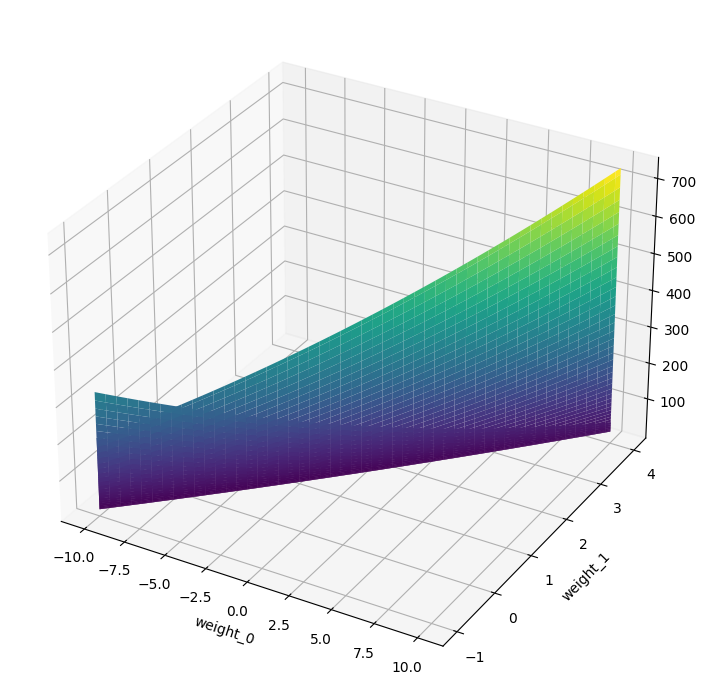

In [22]:
fig = plt.figure(figsize=(18, 9), dpi=100)
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('weight_0')
plt.ylabel('weight_1')
plt.show()

In [18]:
w0, w1

(-3.895780762684331, 1.1930336325735547)

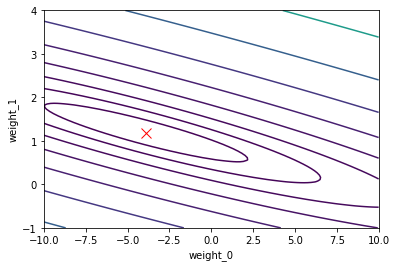

In [19]:
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('weight_0')
plt.ylabel('weight_1')
plt.plot(w0, w1, 'rx', markersize=10, linewidth=2)